## Ranking Analysis

## Vorbereitung: 

In [1]:
##import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly

In [2]:
def get_list_element(val):
    #print(type(val))
    if isinstance(val, list):
        return int(val[0])
    else:
        return int(val)

In [3]:
#file_path: We take the cleaned categories 
file_path = '../results/tts_conslidated_categories.xlsx'

In [4]:
#import datasets
df_regions = pd.read_excel(file_path,sheet_name='regions',index=False)
df_research = pd.read_excel(file_path,sheet_name='research_areas',index=False)
df_special = pd.read_excel(file_path,sheet_name='special',index=False)

# Analyse: 

## Regions

Als erstes wollen wir sehen, wie viele think tanks pro Jahr in einer Kategorie wareN. Dazu erstellen wir eine Tabelle in der für jede Kategorie die Anzahl der think tanks pro Jahr angezeigt wird.

In [5]:
df_regions.head(1)

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1,brookings institution (united states),Top 30 Think Tanks United States,2008,United States,['(united states)'],brookings institution,Top Think Tanks in the United States


### Pivot Tabelle über alle Kategorien und Jahre: 
Jetzt bilden wir eine Tabelle in der wir für jede Kategorie sehene wie viele Think Tanks pro Jahr gerankt wurden. So können wir auf einen Blick erkennen welche Kategorien sich gut für weitere Analysen eignen. Wichtig ist, dass die Kategorie über möglichst viele Jahre existiert und eine recht große Anzahl von Think Tanks beinhaltet. 

In [6]:
table_regions = pd.pivot_table(df_regions, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [7]:
table_regions

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Top 25 Think Tanks in Eastern Europe,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Latin America and the Caribbean,30.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in North America (Non-US),24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including Sub-Saharan Africa),26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Southern Africa (including sub-Saharan Africa),NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Top 40 Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)",NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
Top 40 Think Tanks in Latin America and the Caribbean,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 45 Think Tanks in South and Central America,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tank in the World,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Aussuchen einer geeigneten Kategorie:
Dann suchen wir uns eine Kategorie raus, die vielversprechend aussieht und arbeiten mit ihr weiter. In diesem Fall ist die ausgewählte Kategorie 'Top Think Tanks Worldwide (US and non-US)'. Wir haben sie ausgesucht weil sie seit 2009 dabei ist und stark wächst.
Im nächsten Schritt lassen wir uns die Anzahl der think tanks über die Jahre in der ausgewählten Kategorie anzeigen. Das ist zwar eigentlich nicht nötig, da wir die Informationen schon aus der Tabelle oben haben aber es ist übersichtlicher. 

In [8]:
table_regions.loc['Top Think Tanks Worldwide (US and non-US) ']

Year
2008      NaN
2009     25.0
2010     25.0
2011     30.0
2012    150.0
2013    150.0
2014    150.0
2015    172.0
2016    173.0
2017    172.0
2018    175.0
Name: Top Think Tanks Worldwide (US and non-US) , dtype: float64

Jetzt wollen wir für die ausgewählte Kategorie ein eigenes Dataframe erstellen. Mithilfe eines Index, kann man sich dann die gerankten Think Tanks für ein Jahr anzeigen lassen. Der Index 0 steht hier also für 2009, da die Kategorie in dem Jahr das erste Mal vorkommt. 

In [9]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_worldwide = df_regions[df_regions['cleaned_category']=='Top Think Tanks Worldwide (US and non-US) ']

In [10]:
list_worldwide = []
for year, df_year in test_worldwide.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_worldwide.append(df_year)

In [11]:
#you can access each dataframe by indexing the list:
list_worldwide[0].head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
2009,,,,,,,,
215,1,brookings institution (united states),Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US)
216,2,council on foreign relations us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],council on foreign relations,Top Think Tanks Worldwide (US and non-US)
217,3,carnegie endowment for international peace us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US)
218,4,rand corporation us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],rand corporation,Top Think Tanks Worldwide (US and non-US)
219,5,cato institute us,Top 25 Think Tanks â€“ Worldwide (US and Non-US),2009,United States,[],cato institute,Top Think Tanks Worldwide (US and non-US)


Jetzt werfen wir alle Jahre raus in denen die Anzahl der Think Tanks kleiner als 150 war. Dann legen wir 150 als Höchstwert fest. In den Jahren in denen mehr als 150 Think Tanks gerankt sind werden also trotzdem nur die ersten 150 verwendet. 

In [12]:
#drop years with too little values and set them to equal length of 150:
final_list = []
for l in list_worldwide:
    if len(l)>149.0:
        l = l.head(150).reset_index()
        final_list.append(l)
        
len(final_list)

7

Im nächsten Schritt werden die Ranks in Dezile eingeteilt. Also in zehn gleich große Gruppen. In der Spalte dezil kann jetzt abgelesen werden, in welcher Gruppe ein Think Tank gerankt wurde. 

In [13]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs = []
for f in final_list:
    dz_df = np.array_split(f, 10)
    dz_list = []
    for idx,group in enumerate(dz_df):
        group['dezil'] = idx+1
        dz_list.append(group)
    dz_all = pd.concat(dz_list)
    list_dz_dfs.append(dz_all)

In [14]:
list_dz_dfs[1].head(20)

,2013,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category,dezil
0,2006,1,brookings institution (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],brookings institution,Top Think Tanks Worldwide (US and non-US),1
1,2007,2,chatham house (united kingdom),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united kingdom)'],chatham,Top Think Tanks Worldwide (US and non-US),1
2,2008,3,carnegie endowment for international peace (un...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],carnegie endowment for international peace,Top Think Tanks Worldwide (US and non-US),1
3,2009,4,center for strategic and international studies...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],center for strategic and international studies,Top Think Tanks Worldwide (US and non-US),1
4,2010,5,stockholm international peace research institu...,Top Think Tanks Worldwide (US and non-US),2013,Sweden,"['(sipri)', '(sweden)']",stockholm international peace research institute,Top Think Tanks Worldwide (US and non-US),1
5,2011,6,bruegel (belgium),Top Think Tanks Worldwide (US and non-US),2013,Belgium,['(belgium)'],bruegel,Top Think Tanks Worldwide (US and non-US),1
6,2012,7,council on foreign relations (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],council on foreign relations,Top Think Tanks Worldwide (US and non-US),1
7,2013,8,rand corporation (united states),Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],rand corporation,Top Think Tanks Worldwide (US and non-US),1
8,2014,9,international institute for strategic studies ...,Top Think Tanks Worldwide (US and non-US),2013,United Kingdom,"['(iiss)', '(united kingdom)']",international institute for strategic studies,Top Think Tanks Worldwide (US and non-US),1
9,2015,10,woodrow wilson international center for schola...,Top Think Tanks Worldwide (US and non-US),2013,United States,['(united states)'],woodrow wilson international center for scholars,Top Think Tanks Worldwide (US and non-US),1


## 2: overview of datasets:

In [15]:
#how many think-tanks in total in this category?
top_ww_all = pd.concat(list_dz_dfs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Wieviele einzelne Think Tanks wurden in all den Jahren gerankt? Wenn die Zahl groß ist, bedeutet das, dass viele neue Think Tanks dazu kamen. 
In diesem Fall kamen insgesamt 54 im Laufe der sieben Jahre dazu. 

In [16]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_ww_all['clean_tt'].value_counts())

204

Wir können uns auch für die Think Tanks anzeigen lassen in welchem Dezil sie jedes Jahr gerankt wurden. So kann man schon gut erkennen welche Think Tanks ziemlich stabil waren und bei welchen der Rank stark geschwankt hat. 

In [17]:
top_ww_all.groupby(['clean_tt','Year'])

table_top_ww_all = pd.pivot_table(top_ww_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [18]:
table_top_ww_all

Year,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,
adam smith institute,NaN,NaN,NaN,[9],[9],[9],[9]
african centre for technology studies,[7],NaN,NaN,NaN,NaN,NaN,NaN
african centre for the constructive resolution of disputes,[5],[5],[5],[5],[5],[3],[3]
african economic research consortium,[5],[5],[5],[5],[5],[5],[5]
african technology policy studies network,[7],[7],[7],[7],[7],[7],[7]
al-ahram center for political and strategic studies,[4],[4],[4],[4],[4],[4],[4]
american enterprise institute for public policy research,[2],[2],[2],[2],[2],[3],[3]
amnesty international,[1],[1],[1],[1],[2],[3],[3]
asia society policy institute,NaN,NaN,NaN,[10],[9],[8],[8]


In [19]:
#table_top_ww_all[table_top_ww_all['Year']==2008]

In [20]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years = top_ww_all.groupby('dezil')['clean_tt'].nunique()

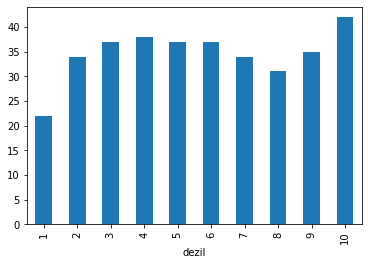

In [21]:
dz_years.plot.bar(x='dezil', y='unique think tanks (2012-18)')
#dz_years.plot(color='orange')

In [22]:
dz_years

dezil
1     22
2     34
3     37
4     38
5     37
6     37
7     34
8     31
9     35
10    42
Name: clean_tt, dtype: int64

In [23]:
sanky = table_top_ww_all[[2012,2018]]
sanky = sanky.fillna(0)

sanky[2012] = sanky[2012].apply(get_list_element)
sanky[2018] = sanky[2018].apply(get_list_element)
sanky['value'] = 1

In [26]:
sanky_export = sanky.groupby([2012,2018]).size().reset_index().rename(columns={0:'count'})
#sanky_export

In [27]:
sanky_export.reset_index().to_csv('../results/sanky_test.csv',index_label=False,index=False)

 Auf dieser Seite kann man Sanky Diagrams erstellen: 
 https://chart-studio.plot.ly

## Research Areas

In [28]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_research = pd.pivot_table(df_research, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))

In [29]:
table_research

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
List of Food Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0
List of Water Security Think Tanks (Alphabetical Listing not ranked),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0
Top Education Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN
Top Defense and National Security Think Tanks,NaN,NaN,NaN,NaN,NaN,65.0,84.0,106.0,108.0,103.0,111.0
Top Domestic Economic Policy Think Tanks,10.0,10.0,25.0,30.0,79.0,79.0,79.0,127.0,130.0,132.0,140.0
Top Domestic Health Affairs Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
Top Domestic Health Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,30.0,55.0,55.0,55.0,NaN
Top Education Policy Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,55.0,65.0,65.0,61.0,65.0
Top Education Policy Think Tanks (Unranked and in Alphabetical order),NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
table_research.loc['Top International Economics Policy Think Tanks']

Year
2008    11.0
2009    10.0
2010    25.0
2011    30.0
2012    49.0
2013    50.0
2014    50.0
2015    81.0
2016    84.0
2017    83.0
2018    86.0
Name: Top International Economics Policy Think Tanks, dtype: float64

In [31]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_int_economics = df_research[df_research['cleaned_category']=='Top International Economics Policy Think Tanks']

In [32]:
list_int_ec = []
for year, df_year in test_int_economics.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_int_ec.append(df_year)

In [33]:
#you can access each dataframe by indexing the list:
list_int_ec[0].head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
2008,,,,,,,,
54,1,brookings institution (usa),top 10 international economic policy think tanks,2008,United States,['(usa)'],brookings institution,Top International Economics Policy Think Tanks
55,2,peterson institute for international economics...,top 10 international economic policy think tanks,2008,United States,['(usa)'],peterson institute for international economics,Top International Economics Policy Think Tanks
56,3,fraser institute (canada),top 10 international economic policy think tanks,2008,Canada,['(canada)'],fraser institute,Top International Economics Policy Think Tanks
57,4,national bureau of economic research (usa),top 10 international economic policy think tanks,2008,United States,['(usa)'],national bureau of economic research,Top International Economics Policy Think Tanks
58,5,"adam smith institute, uk",top 10 international economic policy think tanks,2008,United Kingdom,[],"adam smith institute,",Top International Economics Policy Think Tanks


In [34]:
#drop years with too little values and set them to equal length of 150:
final_list_2 = []
for l in list_int_ec:
    if len(l)>24.0:
        l = l.head(25).reset_index()
        final_list_2.append(l)
        
len(final_list_2)

9

In [35]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs_2 = []
for f in final_list_2:
    dz_df_2 = np.array_split(f, 10)
    dz_list_2 = []
    for idx,group in enumerate(dz_df_2):
        group['dezil'] = idx+1
        dz_list_2.append(group)
    dz_all_2 = pd.concat(dz_list_2)
    list_dz_dfs_2.append(dz_all_2)

In [36]:
list_dz_dfs_2[0].head()

,2010,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category,dezil
0,272,1,brookings institution (united states),top 25 international economic policy think tanks,2010,United States,['(united states)'],brookings institution,Top International Economics Policy Think Tanks,1
1,273,2,peterson institute for international economics...,top 25 international economic policy think tanks,2010,United States,['(united states)'],peterson institute for international economics,Top International Economics Policy Think Tanks,1
2,274,3,chatham house (aka the royal institute of inte...,top 25 international economic policy think tanks,2010,United States,['(aka the royal institute of international af...,chatham house,Top International Economics Policy Think Tanks,1
3,275,4,bruegel (belgium),top 25 international economic policy think tanks,2010,Belgium,['(belgium)'],bruegel,Top International Economics Policy Think Tanks,2
4,276,5,council on foreign relations (cfr) (united sta...,top 25 international economic policy think tanks,2010,United States,"['(cfr)', '(united states)']",council on foreign relations,Top International Economics Policy Think Tanks,2


In [37]:
#how many think-tanks in total in this category?
top_int_ec_all = pd.concat(list_dz_dfs_2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [38]:
#this is the number of think-tanks that have been listed over 7 years within the ranking:
len(top_int_ec_all['clean_tt'].value_counts())

47

In [39]:
top_int_ec_all.groupby(['clean_tt','Year'])

table_top_int_ec_all = pd.pivot_table(top_int_ec_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [40]:
table_top_int_ec_all

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,,,
adam smith institute,NaN,[8],[4],[3],[2],[3],[2],[3],[3]
american enterprise institute for public policy research,[3],[3],[2],[3],[4],[4],[5],[5],[6]
asian development bank institute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[8]
australian institute of international affairs,NaN,NaN,[10],[10],[10],[10],[9],NaN,NaN
berkeley roundtable on the international economy,[5],[5],[4],[5],[8],[5],[6],[7],[7]
brookings institution,[1],[1],[1],[1],[1],[1],[1],[1],[1]
bruegel,[2],[1],[1],[1],[1],[1],[1],[1],[1]
carnegie endowment for international peace,NaN,NaN,[5],[6],[5],[6],NaN,NaN,NaN
cato institute,[3],[3],[6],[8],[5],[6],[7],[8],[10]


In [41]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years_2 = top_int_ec_all.groupby('dezil')['clean_tt'].nunique()

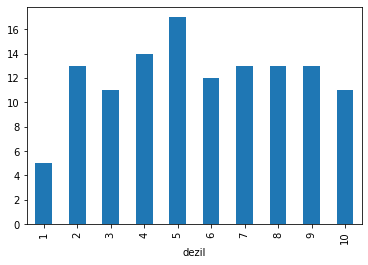

In [42]:
dz_years_2.plot.bar(x='dezil', y='unique think tanks (2010-18)')
#dz_years.plot(color='orange')

In [43]:
dz_years_2

dezil
1      5
2     13
3     11
4     14
5     17
6     12
7     13
8     13
9     13
10    11
Name: clean_tt, dtype: int64

## Special 

In [136]:
#Übersicht wie viele think-tanks pro Jahr pro Kategorie
table_special = pd.pivot_table(df_special, values='clean_tt', index=['cleaned_category'], columns=['Year'], 
               aggfunc=lambda x: len(x.unique()))


In [137]:
table_special

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cleaned_category,,,,,,,,,,,
Best Advocacy Campaign,NaN,NaN,NaN,NaN,74.0,74.0,75.0,88.0,89.0,89.0,94.0
Best For-Profit Think Tanks (Unranked and in Alphabetical order),NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
Best Government Affiliated Think Tanks,NaN,NaN,20.0,30.0,39.0,40.0,44.0,67.0,71.0,71.0,72.0
Best Independent Think Tanks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,145.0,143.0
"Best Independent Think Tanks(Category not in rank order, institutions were nominated but not ranked and are listed in Alphabetical order)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN
Best Institutional Collaboration Involving Two or More Think Tanks,NaN,NaN,NaN,NaN,NaN,79.0,75.0,67.0,75.0,75.0,75.0
Best Managed Think Tanks,NaN,NaN,NaN,NaN,NaN,60.0,65.0,79.0,79.0,78.0,75.0
Best New Idea or Paradigm Developed by a Think Tank,NaN,NaN,NaN,NaN,NaN,40.0,40.0,60.0,65.0,64.0,65.0
Best New Think Tank,NaN,NaN,NaN,NaN,NaN,10.0,27.0,NaN,45.0,50.0,29.0


In [142]:
table_special.loc['Think Tanks with the Best External Relations/Public Engagement Program']

Year
2008     NaN
2009     NaN
2010    25.0
2011    30.0
2012    49.0
2013    50.0
2014    50.0
2015    75.0
2016    75.0
2017    77.0
2018    77.0
Name: Think Tanks with the Best External Relations/Public Engagement Program, dtype: float64

In [143]:
#get dataframe for category: Top Think Tanks Worldwide (US and non-US)
test_innovative = df_special[df_special['cleaned_category']=='Think Tanks with the Most Innovative Policy Ideas/Proposals']

In [144]:
list_innovative = []
for year, df_year in test_innovative.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_innovative.append(df_year)

In [145]:
#you can access each dataframe by indexing the list:
list_innovative[0].head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
2008,,,,,,,,
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...


In [50]:
#drop years with too little values and set them to equal length of 150:
final_list_3 = []
for l in list_innovative:
    if len(l)>24.0:
        l = l.head(25).reset_index()
        final_list_3.append(l)
        
len(final_list_3)

9

In [51]:
#create a list of datasets. each datasets split-rearranged by groups:
list_dz_dfs_3 = []
for f in final_list_3:
    dz_df_3 = np.array_split(f, 10)
    dz_list_3 = []
    for idx,group in enumerate(dz_df_3):
        group['dezil'] = idx+1
        dz_list_3.append(group)
    dz_all_3 = pd.concat(dz_list_3)
    list_dz_dfs_3.append(dz_all_3)

In [52]:
list_dz_dfs_3[0].head()

,2010,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category,dezil
0,52,1,brookings institution (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],brookings institution,Think Tanks with the Most Innovative Policy Id...,1
1,53,2,carnegie endowment for international peace (un...,Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],carnegie endowment for international peace,Think Tanks with the Most Innovative Policy Id...,1
2,54,3,cato institute (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],cato institute,Think Tanks with the Most Innovative Policy Id...,1
3,55,4,new america foundation (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],new america foundation,Think Tanks with the Most Innovative Policy Id...,2
4,56,5,heritage foundation (united states),Think Tanks with the Most Innovative Policy/Id...,2010,United States,['(united states)'],heritage foundation,Think Tanks with the Most Innovative Policy Id...,2


In [53]:
#how many think-tanks in total in this category?
top_innovative_all = pd.concat(list_dz_dfs_3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [54]:
#this is the number of think-tanks that have been listed over the years within the ranking:
len(top_innovative_all['clean_tt'].value_counts())

49

In [55]:
top_innovative_all.groupby(['clean_tt','Year'])

table_top_innovative_all = pd.pivot_table(top_innovative_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [56]:
table_top_innovative_all.head()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,,,
american enterprise institute,[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
american enterprise institute for public policy research,NaN,[5],[4],[5],[5],[7],[7],[8],[9]
berggruen institute,NaN,NaN,NaN,NaN,NaN,NaN,[6],[7],[7]
brookings institution,[1],[1],[1],[1],[1],[1],[1],[1],[1]
carnegie endowment for international peace,[1],[1],[1],[1],[1],[1],[2],[2],[2]


In [57]:
#An initial approach: how many unique think-tanks per decile, over the years?
dz_years_3 = top_innovative_all.groupby('dezil')['clean_tt'].nunique()

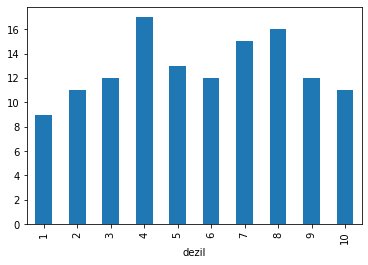

In [58]:
dz_years_3.plot.bar(x='dezil', y='unique think tanks (2010-18)')
#dz_years.plot(color='orange')

In [59]:
dz_years_3

dezil
1      9
2     11
3     12
4     17
5     13
6     12
7     15
8     16
9     12
10    11
Name: clean_tt, dtype: int64

# Were the think tanks in new categories already listed in previeous rankings?

Was wir eigentlich rausfinden wollen ist, ob die Think Tanks in den neu hinzugefügten Kategorien vorher schon im Ranking waren. Vor allem interessiert uns ob die Top 10/Top 20 in anderen Kategorien vorher schon so hoch gerankt wurden. Unsere Vermutung ist es, dass die neuen Kategorien vor allem dazukommen um mehr Think Tanks hoch zu ranken. Dadurch wird das Ranking für eine größere Anzahl an Think Tanks interessant und diese machen dann das Ranking populärer. 
Aber ist das auch wirklich so? 

In [60]:
table_special.loc['Best Advocacy Campaign']

Year
2008     NaN
2009     NaN
2010     NaN
2011     NaN
2012    74.0
2013    74.0
2014    75.0
2015    88.0
2016    89.0
2017    89.0
2018    94.0
Name: Best Advocacy Campaign, dtype: float64

Wir bilden wieder ein Dataframe für die ausgewählte Kategorie. 

In [61]:
#get dataframe for category: Best Advocacy Campaign
test_best_adv = df_special[df_special['cleaned_category']=='Best Advocacy Campaign']

In [62]:
test_best_adv.head(1)

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
1029,1,amnesty international (ai) (united kingdom),Best Advocacy Campaign,2012,United Kingdom,"['(ai)', '(united kingdom)']",amnesty international,Best Advocacy Campaign


In [63]:
list_adv = []
for year, df_year in test_best_adv.groupby('Year'):
    #name the dataframe
    df_year.index.name=year
    #append dataframe to list
    list_adv.append(df_year)

In [64]:
#list_new_adv = []
#for l in list_adv:
#    if len(l)>73:
#        l = l.head(74).reset_index()
#        list_new_adv.append(l)
#        
#len(list_new_adv)

In [65]:
list_dz_dfs_adv = []
for f in list_adv:
    dz_df_adv = np.array_split(f, 10)
    dz_list_adv = []
    for idx,group in enumerate(dz_df_adv):
        group['dezil'] = idx+1
        dz_list_adv.append(group)
    dz_all_adv = pd.concat(dz_list_adv)
    list_dz_dfs_adv.append(dz_all_adv)

In [66]:
list_dz_dfs_adv[0].head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category,dezil
2012,,,,,,,,,
1029,1,amnesty international (ai) (united kingdom),Best Advocacy Campaign,2012,United Kingdom,"['(ai)', '(united kingdom)']",amnesty international,Best Advocacy Campaign,1
1030,2,human rights watch (united kingdom),Best Advocacy Campaign,2012,United Kingdom,['(united kingdom)'],human rights watch,Best Advocacy Campaign,1
1031,3,transparency international (ti) (germany),Best Advocacy Campaign,2012,Germany,"['(ti)', '(germany)']",transparency international,Best Advocacy Campaign,1
1032,4,international crisis group (icg) (belgium),Best Advocacy Campaign,2012,Belgium,"['(icg)', '(belgium)']",international crisis group,Best Advocacy Campaign,1
1033,5,batory foundation (poland),Best Advocacy Campaign,2012,Poland,['(poland)'],batory foundation,Best Advocacy Campaign,1


In [67]:
best_adv_all = pd.concat(list_dz_dfs_adv)

In [68]:
#this is the number of think-tanks that have been listed over the years within the ranking:
len(best_adv_all['clean_tt'].value_counts())

118

In [69]:
best_adv_all.groupby(['clean_tt','Year'])

table_best_adv_all = pd.pivot_table(best_adv_all, values='dezil', index=['clean_tt'], columns=['Year'], 
               aggfunc=lambda x: list(x))

In [70]:
table_best_adv_all.head()

Year,2012,2013,2014,2015,2016,2017,2018
clean_tt,,,,,,,
action,NaN,NaN,NaN,[10],[10],[10],[10]
acton institute,[3],[2],NaN,NaN,NaN,NaN,NaN
acton institute for the study of religion and liberty,NaN,NaN,[2],[2],[1],[1],[1]
adam smith institute,NaN,NaN,NaN,NaN,[4],[4],[4]
adovcates coalition for development,NaN,NaN,NaN,NaN,NaN,NaN,[1]


- create second dataset with all ranked think tanks from 2008 until 2012 - 

In [71]:
test_previous = df_special[df_special['Year']< 2012]

In [72]:
#test_previous

In [73]:
unique_previous = test_previous.groupby('Year')['clean_tt'].nunique()

In [74]:
#test_previous.drop_duplicates(subset='clean_tt')

In [75]:
test_previous.head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...
3,1,european council on foreign relations belgium,Best New Think Tank (established in the last t...,2008,Belgium,[],european council on foreign relations,Best New Think Tank (established in the last t...
4,2,bruegel (belgium),Best New Think Tank (established in the last t...,2008,Belgium,['(belgium)'],bruegel,Best New Think Tank (established in the last t...


In [76]:
test_best_adv['previous'] = test_best_adv['clean_tt'].isin(test_previous['clean_tt'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
test_best_adv.drop_duplicates(subset='clean_tt').previous.value_counts()

False    98
True     20
Name: previous, dtype: int64

Das würde bedeuten, dass 17 % der Think Tanks vorher schon gerankt wurden und 83 % noch nicht gerankt wurden. 

In [78]:
t = pd.merge(test_best_adv[['clean_tt']],test_previous[['clean_tt','cleaned_category','Year']],how='left',left_on='clean_tt',right_on='clean_tt')

In [79]:
t.Year.value_counts()

2011.0    295
2010.0    211
2009.0     42
2008.0     35
Name: Year, dtype: int64

In [80]:
#t.clean_tt.drop_duplicates(['clean_tt','cleaned_category'])
t.head(1)

,clean_tt,cleaned_category,Year
0,amnesty international,Think Tanks with Outstanding Policy-Oriented P...,2010.0


# Entwicklung der Kategorien 
Wir wollen herausfinden wieviele neue Think Tanks in den Kategorien dazukommen. 
Dafür müssen wir erstmal feststellen wann die Kategorie das erste Mal auftaucht und was für Think Tanks in ihr gerankt sind.

Hypothese1: Mit neuen Kategorien werden neue Think Tanks ins Ranking aufgenommen.Die Anzahl neuer Think Tanks in den Kategorien fällt stark über die Jahre. Irgendwann kommen kaum noch neue dazu. 

Hypothese 2: Die Think Tanks die in den neuen Kategorien hoch gerankt sind (Top 20%) sind davor nicht hoch gerankt gewesen. 

## Regions:

In [81]:
#df_regions[df_regions['cleaned_category']== 'Top Thirty Think Tanks in Central and South America']
        

Das Ziel ist, herauszufinden wie viele neue Think Tanks jährlich in den Kategorien dazu kommen. 
Dafür müssen wir erstmal eine Liste der Kategorien erstellen. Dann 

In [82]:
#cats_list

In [83]:
#df_regions.loc['Top Think Tanks in the United States ']
df_regions[df_regions['cleaned_category']== 'Top Think Tanks in the United States'].head()

,Rank,origin_tt_name,Category,Year,Country,parenthesis,clean_tt,cleaned_category
0,1,brookings institution (united states),Top 30 Think Tanks United States,2008,United States,['(united states)'],brookings institution,Top Think Tanks in the United States
1,2,council on foreign relations,Top 30 Think Tanks United States,2008,United States,[],council on foreign relations,Top Think Tanks in the United States
2,3,carnegie endowment for international peace,Top 30 Think Tanks United States,2008,United States,[],carnegie endowment for international peace,Top Think Tanks in the United States
3,4,rand corporation,Top 30 Think Tanks United States,2008,United States,[],rand corporation,Top Think Tanks in the United States
4,5,heritage foundation,Top 30 Think Tanks United States,2008,United States,[],heritage foundation,Top Think Tanks in the United States


In [84]:
#Hier wird eine Liste der Kategorien in regions erstellt und Duplikate gelöscht. 
cats_list = df_regions['cleaned_category'].drop_duplicates().to_list()

#Hier wird eine leere Liste erstellt, in der später die Ergebnisse gespeichert werden.
RESULTS = []

#Hier wird für jede Kategorie ein Dataframe erstellt. 
for cat in cats_list:
    individual_df = df_regions[df_regions['cleaned_category']== cat]
    start_year = individual_df['Year'].min()
    end_year = individual_df['Year'].max()
    timespan = range(start_year,end_year+1)
    
#Hier wird nach den Ergebnissen für jedes Jahr geschaut. Dann werden zwei Dataframes erstellt, 
#einmal für alle Jahre, die kleiner als das angegebne Jahr sind und einmal nur für das Vorjahr.  
    category_results = {}
    for year in timespan:
        prev_ranks_all = df_regions[df_regions['Year']< year]
        prev_ranks_one_year = df_regions[df_regions['Year']== year - 1]
#Check : individual_df wird nochmals neu definiert, 
#da sonst nur der Referenzrahmen des vorheringen Jahres bzw. Loops als instanz besteht 
        individual_df = df_regions[df_regions['cleaned_category']== cat]
        individual_df = individual_df[individual_df['Year'] == year]

        individual_df['previous_all'] = individual_df['clean_tt'].isin(prev_ranks_all['clean_tt'])
        individual_df['previous_one_year'] = individual_df['clean_tt'].isin(prev_ranks_one_year['clean_tt'])
#        
        stats_all = individual_df.drop_duplicates(subset='clean_tt').previous_all.value_counts()
        #stats_one_year = individual_df.drop_duplicates(subset='clean_tt').previous_one_year.value_counts()
    
        if False in stats_all.index:
            new_tts = stats_all.loc[False]
        else:
            new_tts = 0
        if True in stats_all.index:
            old_tts = stats_all.loc[True]
        else:
            old_tts=0
        
        total = new_tts+old_tts
        
        if total == 0:
            result = {year:0}
            category_results.update(result)
        else:
            perc_new_tts = new_tts/total
            #print(perc_new_tts)
            result = {year:perc_new_tts}
            category_results.update(result)
        
        
        
    final_results = {cat:category_results}
    RESULTS.append(final_results)


In [85]:
cat_reg_dev = []
for result in RESULTS:
    row = pd.DataFrame(result).T
    cat_reg_dev.append(row)
    #print(cat_reg_dev)
    
    

cat_reg_dev_df = pd.concat(cat_reg_dev).round(4) 

In [86]:
cat_reg_dev_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Top Think Tanks in the United States,1.0,0.4800,0.36,0.1000,0.1455,0.0000,0.1500,0.2000,0.1778,0.0111,0.0928
Top 25 Think Tanks in North America (Non-US),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top 25 Think Tanks in Latin America and the Caribbean,1.0,0.0000,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tanks in Middle East and North Africa (MENA),1.0,0.4000,0.48,0.4000,0.3636,0.1800,0.3091,0.2800,0.0133,0.2222,0.1942
Top 25 Think Tanks in Southern Africa (including Sub-Saharan Africa),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tanks in Western Europe,1.0,0.5750,0.36,0.4000,0.3867,0.0000,0.1500,0.3465,0.0080,0.0081,0.1631
Top 25 Think Tanks in Eastern Europe,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tanks in Asia,1.0,0.3750,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top Think Tank in the World,NaN,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Top Think Tanks Worldwide (US and non-US),NaN,0.7600,0.20,0.1667,0.3133,0.0067,0.1000,0.0407,0.0000,0.0174,0.0457


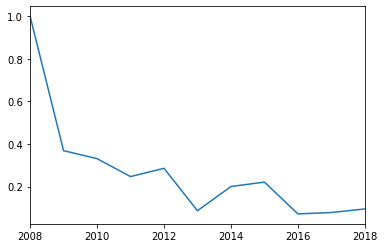

In [87]:
cat_reg_dev_df.mean().plot.line(x='% of new think tanks', y='category')

In [88]:
cat_reg_dev_df.mean()

2008    1.000000
2009    0.368458
2010    0.330909
2011    0.246675
2012    0.285467
2013    0.086308
2014    0.200000
2015    0.220708
2016    0.071238
2017    0.077792
2018    0.094708
dtype: float64

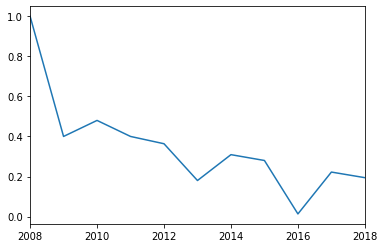

In [89]:
cat_reg_dev_df.loc["Top Think Tanks in Middle East and North Africa (MENA)"].plot.line(x='% of new think tanks', y='category')

## Research Areas: 

Jetzt machen wir genau das selbe für die Research Areas. 
wir hängen überall rs (research) dran, damit wir nicht durcheinander kommen. 

In [90]:
cats_list_rs = df_research['cleaned_category'].drop_duplicates().to_list()
cats_results_rs = {}

RESULTS_research = []

for cat in cats_list_rs:
    individual_df_rs = df_research[df_research['cleaned_category']== cat]
    start_year_rs = individual_df_rs['Year'].min()
    end_year_rs = individual_df_rs['Year'].max()
    timespan_rs = range(start_year_rs,end_year_rs+1)
    
    
    category_results_rs = {}
    for year in timespan_rs:
        prev_ranks_all_rs = df_research[df_research['Year']< year]
        prev_ranks_one_year_rs = df_research[df_research['Year']== year - 1]
        
        individual_df_rs = df_research[df_research['cleaned_category']== cat]
        individual_df_rs = individual_df_rs[individual_df_rs['Year'] == year]
        
        individual_df_rs['previous_all_rs'] = individual_df_rs['clean_tt'].isin(prev_ranks_all_rs['clean_tt'])
        individual_df_rs['previous_one_year_rs'] = individual_df_rs['clean_tt'].isin(prev_ranks_one_year_rs['clean_tt'])
        
        stats_all_rs = individual_df_rs.drop_duplicates(subset='clean_tt').previous_all_rs.value_counts()
        #stats_one_year = individual_df.drop_duplicates(subset='clean_tt').previous_one_year_rs.value_counts()
    
        if False in stats_all_rs.index:
            new_tts_rs = stats_all_rs.loc[False]
        else:
            new_tts_rs = 0
        if True in stats_all_rs.index:
            old_tts_rs = stats_all_rs.loc[True]
        else:
            old_tts_rs=0
        
        total_rs = new_tts_rs+old_tts_rs
        
        if total_rs == 0:
            result_rs = {year:0}
            category_results_rs.update(result)
        else:
            perc_new_tts_rs = new_tts_rs/total_rs
            result_rs = {year:perc_new_tts_rs}
            category_results_rs.update(result_rs)
        
        
    final_results_rs = {cat:category_results_rs}
    RESULTS_research.append(final_results_rs)

In [91]:
cat_res_dev = []
for result in RESULTS_research:
    row = pd.DataFrame(result).T
    cat_res_dev.append(row)
    #print(result)
    
    

cat_res_dev_df = pd.concat(cat_res_dev).round(4) 

In [92]:
cat_res_dev_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Top International Development Policy Think Tanks,1.0,0.1000,0.8400,0.4000,0.4750,0.0000,0.1375,0.1328,0.0385,0.0076,0.0152
Top Health Policy Think Tanks,1.0,0.3000,0.6000,0.0000,0.2414,0.0333,NaN,NaN,NaN,NaN,NaN
Top Environment Policy Think Tanks,1.0,0.3636,0.7600,0.4912,0.6029,0.0290,0.2000,0.2340,0.0106,0.0215,0.0505
Top Security and International Affairs Think Tanks,1.0,0.0000,0.6000,0.5400,0.3676,NaN,NaN,NaN,NaN,NaN,NaN
Top Domestic Economic Policy Think Tanks,1.0,0.1000,0.6400,0.3000,0.5570,0.0000,0.1519,0.2835,0.0154,0.0152,0.0500
Top International Economics Policy Think Tanks,1.0,0.2000,0.7200,0.3333,0.2245,0.0200,0.1600,0.2222,0.0357,0.0000,0.0465
Top Social Policy Think Tanks,1.0,0.1000,0.7600,0.1667,0.2800,0.0600,0.1400,0.3093,0.0204,0.0000,0.0660
Top Science and Technology Policy Think Tanks,NaN,0.6000,0.9583,0.3667,0.2200,0.0000,0.2889,0.2090,0.0580,0.0000,0.0278
Top Transparency and Good Governance Think Tanks,NaN,NaN,1.0000,0.2667,0.0667,0.0000,0.3750,0.3000,0.0625,0.0000,0.2239
Top Energy and Resource Policy Think Tanks,NaN,NaN,NaN,NaN,0.8000,0.0000,0.3667,0.2545,0.0000,0.0370,0.0500


In [93]:
cat_res_dev_df.fillna(0)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Top International Development Policy Think Tanks,1.0,0.1000,0.8400,0.4000,0.4750,0.0000,0.1375,0.1328,0.0385,0.0076,0.0152
Top Health Policy Think Tanks,1.0,0.3000,0.6000,0.0000,0.2414,0.0333,0.0000,0.0000,0.0000,0.0000,0.0000
Top Environment Policy Think Tanks,1.0,0.3636,0.7600,0.4912,0.6029,0.0290,0.2000,0.2340,0.0106,0.0215,0.0505
Top Security and International Affairs Think Tanks,1.0,0.0000,0.6000,0.5400,0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Top Domestic Economic Policy Think Tanks,1.0,0.1000,0.6400,0.3000,0.5570,0.0000,0.1519,0.2835,0.0154,0.0152,0.0500
Top International Economics Policy Think Tanks,1.0,0.2000,0.7200,0.3333,0.2245,0.0200,0.1600,0.2222,0.0357,0.0000,0.0465
Top Social Policy Think Tanks,1.0,0.1000,0.7600,0.1667,0.2800,0.0600,0.1400,0.3093,0.0204,0.0000,0.0660
Top Science and Technology Policy Think Tanks,0.0,0.6000,0.9583,0.3667,0.2200,0.0000,0.2889,0.2090,0.0580,0.0000,0.0278
Top Transparency and Good Governance Think Tanks,0.0,0.0000,1.0000,0.2667,0.0667,0.0000,0.3750,0.3000,0.0625,0.0000,0.2239
Top Energy and Resource Policy Think Tanks,0.0,0.0000,0.0000,0.0000,0.8000,0.0000,0.3667,0.2545,0.0000,0.0370,0.0500


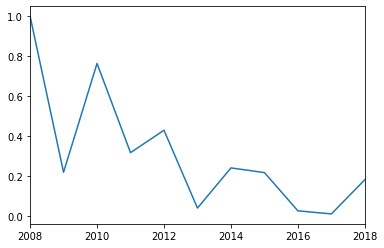

In [94]:
cat_res_dev_df.mean().plot.line(x='% of new think tanks', y='category')

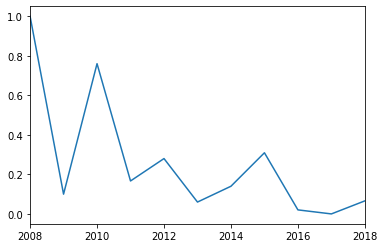

In [95]:
cat_res_dev_df.loc['Top Social Policy Think Tanks'].plot.line(x='% of new think tanks', y='category')

## Special Categories

Und zum Schluss machen wir das selbe für die Spezial-Kategorien. 
Wir hängen überall sp (special) dran, damit wir nicht durcheinander kommen. 

In [122]:
df_special.head()


,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...
3,1,european council on foreign relations belgium,Best New Think Tank (established in the last t...,2008,Belgium,[],european council on foreign relations,Best New Think Tank (established in the last t...
4,2,bruegel (belgium),Best New Think Tank (established in the last t...,2008,Belgium,['(belgium)'],bruegel,Best New Think Tank (established in the last t...


In [123]:
cats_list_sp = df_special['cleaned_category'].drop_duplicates().to_list()

RESULTS_special = []

for cat in cats_list_sp:
    individual_df_sp = df_special[df_special['cleaned_category']== cat]
    start_year_sp = individual_df_sp['Year'].min()
    end_year_sp = individual_df_sp['Year'].max()
    timespan_sp = range(start_year_sp,end_year_sp+1)
    
    
    category_results_sp = {}
    for year in timespan_sp:
        prev_ranks_all_sp = df_special[df_special['Year'] < year]
        prev_ranks_one_year_sp = df_special[df_special['Year']== year - 1]
        
        
        individual_df_sp = df_special[df_special['cleaned_category']== cat]
        individual_df_sp = individual_df_sp[individual_df_sp['Year'] == year]
        
        individual_df_sp['previous_all_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_all_sp['clean_tt'])
        individual_df_sp['previous_one_year_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_one_year_sp['clean_tt'])
        
        
        stats_all_sp = individual_df_sp.drop_duplicates(subset='clean_tt').previous_all_sp.value_counts()
        #stats_one_year = individual_df_sp.drop_duplicates(subset='clean_tt').previous_one_year_sp.value_counts()
    
        if False in stats_all_sp.index:
            new_tts_sp = stats_all_sp.loc[False]
        else:
            new_tts_sp = 0
        if True in stats_all_sp.index:
            old_tts_sp = stats_all_sp.loc[True]
        else:
            old_tts_sp=0
        
        total_sp = new_tts_sp+old_tts_sp
        
        if total_sp == 0:
            result_sp = {year:0}
            category_results_sp.update(result_sp)
        else:
            perc_new_tts_sp = new_tts_sp/total_sp
            result_sp = {year:perc_new_tts_sp}
            category_results_sp.update(result_sp)
        
    final_results_sp = {cat:category_results_sp}
    #print(final_results_sp)
    RESULTS_special.append(final_results_sp)

In [124]:
cat_spec_dev = []
for result in RESULTS_special:
    #print(result)
    row = pd.DataFrame(result).T
    cat_spec_dev.append(row)
    
cat_spec_dev_df = pd.concat(cat_spec_dev).round(4) 

In [125]:
cat_spec_dev_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Think Tanks with the Most Innovative Policy Ideas/Proposals,1.0,0.0,0.88,0.2000,0.2667,0.0000,0.0333,0.0323,0.0857,0.0,0.0833
Best New Think Tank (established in the last three-five years),1.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Think Tanks with Outstanding Policy-Oriented Public Programs,1.0,0.2,0.84,0.3333,0.0000,0.0333,0.0333,NaN,NaN,NaN,NaN
Think Tank with the Best Use of the Internet,1.0,0.0,0.70,0.3667,0.2000,0.0000,0.1250,0.0625,0.0833,0.0,0.1692
Think Tanks with the Best Use of the Media (Print or Electronic),1.0,0.2,0.70,0.4000,0.0000,0.0286,0.0250,NaN,NaN,NaN,NaN


### Durchschnitt der prozentualen Zunahme neuer Think Tanks pro Jahr: 

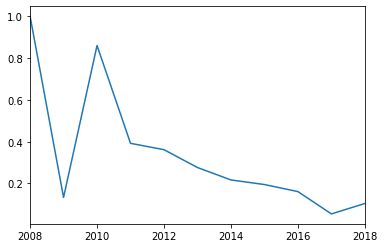

In [126]:
cat_spec_dev_df.mean().plot.line(x='% of new think tanks', y='category')

In [127]:
cat_spec_dev_df.mean()

2008    1.000000
2009    0.133333
2010    0.860000
2011    0.392118
2012    0.361675
2013    0.276288
2014    0.216944
2015    0.194932
2016    0.161173
2017    0.054424
2018    0.104368
dtype: float64

### Anzahl der Kategorien über die Zeit!

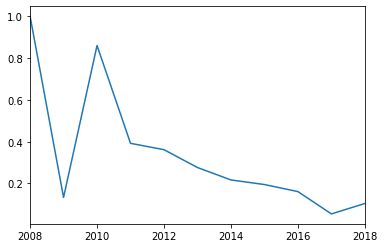

In [105]:
cat_spec_dev_df.mean().plot.line(x='% of new think tanks', y='category')

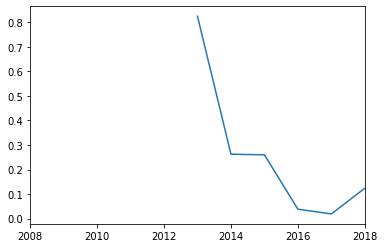

In [106]:
cat_spec_dev_df.loc['Think Tank to Watch'].plot.line(x='% of new think tanks', y='category')

SAVE:

In [107]:
writer = pd.ExcelWriter('categories_development_new.xlsx', engine='xlsxwriter')
cat_reg_dev_df.to_excel(writer,sheet_name='regions')
cat_res_dev_df.to_excel(writer,sheet_name='research_areas')
cat_spec_dev_df.to_excel(writer,sheet_name='special_categories')

writer.save()

In [108]:
writer = pd.ExcelWriter('categories_tables.xlsx', engine='xlsxwriter')
table_regions.to_excel(writer,sheet_name='regions')
table_research.to_excel(writer,sheet_name='research_areas')
table_special.to_excel(writer,sheet_name='special_categories')

writer.save()

# Hypothese 2: Die Think Tanks die in den neuen Kategorien hoch gerankt sind (Top 20%) sind davor nicht hoch gerankt gewesen. 

## Regions:

new_cats = 
regions: 
2009: 
- Top Think Tank in the World
- Top 25 Think Tanks Worldwide (US and Non-US) 
- Top 50 Think Tanks Worldwide (Non-US)
2011:
- Top 30 Think Tanks in Mexico, Canada, and the Caribbean
- Top 30 Think Tanks in Central and SOuth America
2012: 
- Top Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)
- Top 45 Think Tanks in China, India, Japan, and the Republic of Korea
- Top Think Tanks in Central Asia
2014:
- Top Think Tanks in Asia and the Pacific

research areas: 
2009: 
- Science and Technology
2010:
- Transparency and Good Governance
2012:
- Energy and Resource Policy
- Education Policy
2013:
- Defense and National Security
- Foreign Policy and International Affairs
2014:
- Domestic Health Policy
- Global Health Policy
2018:
- List of Food Security Think Tanks
- List of Water Security Think Tanks 

special: 
2010:
- Best External Relations/Public Engagement Program
- Best University Affiliated Think Tanks
- Best Government Affiliated Think Tanks
- Best Party Affiliated Think Tanks 
2011:
- Top Think Tanks with Annual Operating Budgets of Less Than $5 Million USD
2012:
- Best For-Profit Think Tanks (Unranked and in Alphabetical order)
- Best Advocacy Campaign
- Best Policy Study/Report Produced by a Think Tank 2011-2012
2013: 
- Best Institutional Collaboration Involving Two or More Think Tanks
- Best Managed Think Tanks
- Best New Idea or Paradigm Developed by a Think Tank
- Best Think Tank Conference
- Best Think Tank Network 
- Best Transdisciplinary Research Program at a Think Tank
- Think Tank to Watch 
2015:
- Best Indipendent Think Tanks(Category not in rank order, institutions were nominated but not ranked and are listed in Alphabetical order)
- Best Quality Assurance and Integrity Policies and Procedures
2016:
- Best Regional Studies Center(Free Standing)
- Best Regional Studies Center (University-Affiliated) 


In [109]:
individual_new = individual_df['cleaned_category'].drop_duplicates().to_list()

In [110]:
individual_new

['Top Think Tanks in Southeast Asia and the Pacific']

In [111]:
## do we need a z-score transformation here?

In [166]:
cats_list_sp = df_special['cleaned_category'].drop_duplicates().to_list()

RESULTS_special = []

for cat in cats_list_sp:
    individual_df_sp = df_special[df_special['cleaned_category']== cat]
    start_year_sp = individual_df_sp['Year'].min()
    end_year_sp = individual_df_sp['Year'].max()
    timespan_sp = range(start_year_sp,end_year_sp+1)
    
    
    category_results_sp = {}
    for year in timespan_sp:
        prev_ranks_all_sp = df_special[df_special['Year'] < year]
        prev_ranks_one_year_sp = df_special[df_special['Year']== year - 1]
#-------------------------------------------------------------------------------------------------------------------------        
# Neuer Teil: Hier werden die Ranks gezählt und ein Quotient 
# aus der Ranking Position geteilt durch die Anzahl der Ranks gebildet.         
        prev_ranks_one_year_sp= df_special[df_special['Year']== year - 1]
        prev_ranks_one_year_sp_sum = pd.DataFrame(prev_ranks_one_year_sp.groupby('cleaned_category')['Rank'].count())
        prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.reset_index()
        prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.rename(columns={'Rank':'Ranks_sum'}) 
        prev_ranks_one_year_sp_sum = pd.merge(prev_ranks_one_year_sp,prev_ranks_one_year_sp_sum,how='left',left_on='cleaned_category',right_on='cleaned_category')
        prev_ranks_one_year_sp_sum['Rank_quot'] = prev_ranks_one_year_sp_sum['Rank']/prev_ranks_one_year_sp_sum['Ranks_sum']
        
        #get the mean for multiple rankings of each think tank
        prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.groupby('clean_tt').mean().reset_index()
#-------------------------------------------------------------------------------------------------------------------------
        
        individual_df_sp = df_special[df_special['cleaned_category']== cat]
        individual_df_sp = individual_df_sp[individual_df_sp['Year'] == year]
        
        final_results_sp = pd.merge(individual_df_sp,prev_ranks_one_year_sp_sum[['clean_tt','Rank_quot']],how='left',on='clean_tt')
        
        #individual_df_sp['previous_all_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_all_sp['clean_tt'])
        #individual_df_sp['previous_one_year_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_one_year_sp['clean_tt'])
        
        
        #stats_all_sp = individual_df_sp.drop_duplicates(subset='clean_tt').previous_all_sp.value_counts()
        #stats_one_year = individual_df_sp.drop_duplicates(subset='clean_tt').previous_one_year_sp.value_counts()

        
    #final_results_sp = {cat:category_results_sp}
    #print(final_results_sp)
        RESULTS_special.append(final_results_sp)

In [167]:
RESULTS_special = pd.concat(RESULTS_special)
RESULTS_special.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Category,Rank,Rank_quot,Year,clean_tt,cleaned_category,country,origin_tt_name,parenthesis
0,Think Tanks with the Most Innovative Policy/Id...,1,NaN,2008,cato institute,Think Tanks with the Most Innovative Policy Id...,United States,cato institute (usa),['(usa)']
1,Think Tanks with the Most Innovative Policy/Id...,2,NaN,2008,brookings institute,Think Tanks with the Most Innovative Policy Id...,United States,brookings institute usa,[]
2,Think Tanks with the Most Innovative Policy/Id...,3,NaN,2008,"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...,United States,"carnegie endowment for international peace, us",[]
0,Think Tanks with the Most Innovative Policy/Id...,1,0.5,2009,brookings institution,Think Tanks with the Most Innovative Policy Id...,United States,brookings institution usa,[]
1,Think Tanks with the Most Innovative Policy/Id...,2,1.0,2009,"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...,United States,"carnegie endowment for international peace, us",[]


In [114]:
test_df = df_special[df_special['Year']== 2009 - 1]
test_df_cats = pd.DataFrame(test_df.groupby('cleaned_category')['Rank'].count())
test_df_cats = test_df_cats.reset_index()
test_df_cats = test_df_cats.rename(columns={'Rank':'Ranks_sum'}) 
test_df_cats = pd.merge(test_df,test_df_cats,how='left',left_on='cleaned_category',right_on='cleaned_category')
test_df_cats['Rank_quot'] = test_df_cats['Rank']/test_df_cats['Ranks_sum']
test_df_cats.groupby('clean_tt').mean().reset_index()
#test_df.groupby(['Category','clean_tt']).mean()
#test_df_cats.head()

,clean_tt,Rank,Year,Ranks_sum,Rank_quot
0,"american enterprise institute,",3.000000,2008.0,4.0,0.750000
1,brookings institute,2.000000,2008.0,3.0,0.666667
2,brookings institution,1.600000,2008.0,3.2,0.500000
3,bruegel,2.000000,2008.0,3.0,0.666667
4,"carnegie endowment for international peace,",3.000000,2008.0,3.0,1.000000
5,cato institute,2.000000,2008.0,3.0,0.666667
6,"center for american progress,",3.000000,2008.0,3.0,1.000000
7,council on foreign relations,1.000000,2008.0,3.0,0.333333
8,european council on foreign relations,1.000000,2008.0,3.0,0.333333
9,henry l. stimson center -,3.000000,2008.0,4.0,0.750000


In [153]:
test_df_cats.head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category,Ranks_sum,Rank_quot
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...,3,0.333333
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...,3,0.666667
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...,3,1.000000
3,1,european council on foreign relations belgium,Best New Think Tank (established in the last t...,2008,Belgium,[],european council on foreign relations,Best New Think Tank (established in the last t...,3,0.333333
4,2,bruegel (belgium),Best New Think Tank (established in the last t...,2008,Belgium,['(belgium)'],bruegel,Best New Think Tank (established in the last t...,3,0.666667


In [116]:
prev_ranks_all_sp = df_special[df_special['Year'] < 2009]
prev_ranks_one_year_sp = df_special[df_special['Year']== year - 1]
        
        
prev_ranks_one_year_sp= df_special[df_special['Year']== year - 1]
prev_ranks_one_year_sp_sum = pd.DataFrame(prev_ranks_one_year_sp.groupby('cleaned_category')['Rank'].count())
prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.reset_index()
prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.rename(columns={'Rank':'Ranks_sum'}) 
prev_ranks_one_year_sp_sum = pd.merge(prev_ranks_one_year_sp,prev_ranks_one_year_sp_sum,how='left',left_on='cleaned_category',right_on='cleaned_category')
prev_ranks_one_year_sp_sum['Rank_quot'] = prev_ranks_one_year_sp_sum['Rank']/prev_ranks_one_year_sp_sum['Ranks_sum']
        
prev_ranks_one_year_sp_sum_mean = prev_ranks_one_year_sp_sum.groupby('clean_tt')['Rank_quot'].mean().reset_index()
        #print(prev_ranks_one_year_sp_sum['Rank_quot'])

In [117]:
test = pd.merge(prev_ranks_one_year_sp_sum,prev_ranks_one_year_sp_sum_mean,how='left',on='clean_tt').value_counts.value_counts

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [118]:
test.head()

NameError: name 'test' is not defined

## Anderer Ansatz: 

Das mit dem Quotienten war zu kompliziert. 
Unser eigentliches Ziel ist es, die Top Think Tanks der neuen Kategorien rauszufiltern und bei diesen dann zu überprüfen wie hoch diese vorher gerankt wurden. 
Die Vermutung ist, dass sie vorher nie so hoch gerankt wurden und die neuen Kategorien genau deswegen eingeführt werden. Andere Think Tanks werden hoch gerankt und der GGTTIR wird dadurch interessanter für sie und sie erwähnen ihn eher auf ihrer Webseite und ähnlichem. 

In [151]:
new_cat_dic = {'Top Think Tank in the World', 'Top 25 Think Tanks Worldwide (US and Non-US)', 
               'Top 50 Think Tanks Worldwide (Non-US)', 'Top 30 Think Tanks in Mexico, Canada, and the Caribbean',
               'Top 30 Think Tanks in Central and SOuth America', 
               'Top Think Tanks in Asia (Excluding China, India, Japan, and the Republic of Korea)',
               'Top 45 Think Tanks in China, India, Japan, and the Republic of Korea',
               'Top Think Tanks in Central Asia', 'Top Think Tanks in Asia and the Pacific', 'Science and Technology',
               'Transparency and Good Governance', 'Energy and Resource Policy', 'Education Policy',
               'Defense and National Security', 'Foreign Policy and International Affairs', 'Domestic Health Policy',
               'Global Health Policy', 'List of Food Security Think Tanks', 'List of Water Security Think Tanks',
               'Best External Relations/Public Engagement Program', 'Best University Affiliated Think Tanks',
               'Best Government Affiliated Think Tanks', 'Best Party Affiliated Think Tanks', 
               'Top Think Tanks with Annual Operating Budgets of Less Than $5 Million USD', 
               'Best For-Profit Think Tanks (Unranked and in Alphabetical order)', 'Best Advocacy Campaign',
               'Best Policy Study/Report Produced by a Think Tank 2011-2012', 
               'Best Institutional Collaboration Involving Two or More Think Tanks', 'Best Managed Think Tanks',
               'Best New Idea or Paradigm Developed by a Think Tank', 'Best Think Tank Conference', 
               'Best Think Tank Network', 'Best Transdisciplinary Research Program at a Think Tank',
               'Think Tank to Watch', 
               'Best Indipendent Think Tanks(Category not in rank order, institutions were nominated but not ranked and are listed in Alphabetical order)',
               'Best Quality Assurance and Integrity Policies and Procedures','Best Regional Studies Center(Free Standing)',
               'Best Regional Studies Center (University-Affiliated)'}

In [168]:
cats_list_sp = df_special['cleaned_category'].drop_duplicates().to_list()

RESULTS_special = []

for cat in cats_list_sp:
    individual_df_sp = df_special[df_special['cleaned_category']== cat]
    start_year_sp = individual_df_sp['Year'].min()
    end_year_sp = individual_df_sp['Year'].max()
    timespan_sp = range(start_year_sp,end_year_sp+1)
    
    
    category_results_sp = {}
    for year in timespan_sp:
        prev_ranks_all_sp = df_special[df_special['Year'] < year]
        prev_ranks_one_year_sp = df_special[df_special['Year']== year - 1]
#-------------------------------------------------------------------------------------------------------------------------        
# Neuer Teil: Hier werden die Ranks gezählt und ein Quotient 
# aus der Ranking Position geteilt durch die Anzahl der Ranks gebildet.         
        prev_ranks_one_year_sp= df_special[df_special['Year']== year - 1]
        prev_ranks_one_year_sp_sum = pd.DataFrame(prev_ranks_one_year_sp.groupby('cleaned_category')['Rank'].count())
        prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.reset_index()
        prev_ranks_one_year_sp_sum = prev_ranks_one_year_sp_sum.rename(columns={'Rank':'Ranks_sum'}) 
        prev_ranks_one_year_sp_sum = pd.merge(prev_ranks_one_year_sp,prev_ranks_one_year_sp_sum,how='left',left_on='cleaned_category',right_on='cleaned_category')
        prev_ranks_one_year_sp_sum['Rank_quot'] = prev_ranks_one_year_sp_sum['Rank']/prev_ranks_one_year_sp_sum['Ranks_sum']
        
#-------------------------------------------------------------------------------------------------------------------------
        
        individual_df_sp = df_special[df_special['cleaned_category']== cat]
        individual_df_sp = individual_df_sp[individual_df_sp['Year'] == year]
        
        final_results_sp = pd.merge(individual_df_sp,prev_ranks_one_year_sp_sum[['clean_tt','Rank_quot']],how='left',on='clean_tt')
        
        #individual_df_sp['previous_all_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_all_sp['clean_tt'])
        #individual_df_sp['previous_one_year_sp'] = individual_df_sp['clean_tt'].isin(prev_ranks_one_year_sp['clean_tt'])
        
        
        #stats_all_sp = individual_df_sp.drop_duplicates(subset='clean_tt').previous_all_sp.value_counts()
        #stats_one_year = individual_df_sp.drop_duplicates(subset='clean_tt').previous_one_year_sp.value_counts()

        
    #final_results_sp = {cat:category_results_sp}
    #print(final_results_sp)
        RESULTS_special.append(final_results_sp)

In [171]:
RESULTS_special

[   Rank                                  origin_tt_name  \
 0     1                            cato institute (usa)   
 1     2                        brookings institute  usa   
 2     3  carnegie endowment for international peace, us   
 
                                             Category  Year        country  \
 0  Think Tanks with the Most Innovative Policy/Id...  2008  United States   
 1  Think Tanks with the Most Innovative Policy/Id...  2008  United States   
 2  Think Tanks with the Most Innovative Policy/Id...  2008  United States   
 
   parenthesis                                      clean_tt  \
 0   ['(usa)']                                cato institute   
 1          []                         brookings institute     
 2          []  carnegie endowment for international peace,    
 
                                     cleaned_category  Rank_quot  
 0  Think Tanks with the Most Innovative Policy Id...        NaN  
 1  Think Tanks with the Most Innovative Policy Id..

Dataframe nur für die neuen Kategorien erstellen. 


In [161]:
individual_df_sp.head()

,Rank,origin_tt_name,Category,Year,country,parenthesis,clean_tt,cleaned_category
0,1,cato institute (usa),Think Tanks with the Most Innovative Policy/Id...,2008,United States,['(usa)'],cato institute,Think Tanks with the Most Innovative Policy Id...
1,2,brookings institute usa,Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],brookings institute,Think Tanks with the Most Innovative Policy Id...
2,3,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2008,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...
22,1,brookings institution usa,Think Tanks with the Most Innovative Policy/Id...,2009,United States,[],brookings institution,Think Tanks with the Most Innovative Policy Id...
23,2,"carnegie endowment for international peace, us",Think Tanks with the Most Innovative Policy/Id...,2009,United States,[],"carnegie endowment for international peace,",Think Tanks with the Most Innovative Policy Id...
